# Map of Crime Occurrences in Last 5 Years

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.cm
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

ImportError: No module named 'mpl_toolkits.basemap'

In [2]:
df=pd.read_csv('../data/Crimes_-_2001_to_present.csv')

In [3]:
#Print the output
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,5708019,HN516812,08/07/2007 05:00:00 PM,018XX W 103RD ST,1310,CRIMINAL DAMAGE,TO PROPERTY,CONSTRUCTION SITE,False,False,...,19.0,72.0,14,1165922.0,1836379.0,2007,04/15/2016 08:55:02 AM,41.706602,-87.668011,"(41.706601577, -87.668010676)"
1,5708022,HN515380,08/07/2007 09:00:00 PM,066XX S ELLIS AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,"SCHOOL, PUBLIC, BUILDING",False,False,...,5.0,42.0,18,1184028.0,1861290.0,2007,04/15/2016 08:55:02 AM,41.774557,-87.600931,"(41.77455706, -87.600931147)"
2,5708025,HN516837,08/03/2007 10:00:00 AM,054XX W WINDSOR AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,45.0,15.0,14,1139275.0,1929741.0,2007,04/15/2016 08:55:02 AM,41.963325,-87.763324,"(41.963324609, -87.763324045)"
3,5708028,HN516787,08/03/2007 04:30:00 PM,001XX N STATE ST,0820,THEFT,$500 AND UNDER,GROCERY FOOD STORE,False,False,...,42.0,32.0,06,1176336.0,1901448.0,2007,04/15/2016 08:55:02 AM,41.884930,-87.627920,"(41.884930201, -87.627919724)"
4,5708029,HN495945,07/29/2007 10:02:00 AM,078XX S BENNETT AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,VEHICLE NON-COMMERCIAL,True,False,...,8.0,43.0,18,1190231.0,1853330.0,2007,04/15/2016 08:55:02 AM,41.752567,-87.578448,"(41.752566947, -87.578448404)"


In [4]:
df = df[df['Year'] > 2011]

NameError: name 'Basemap' is not defined

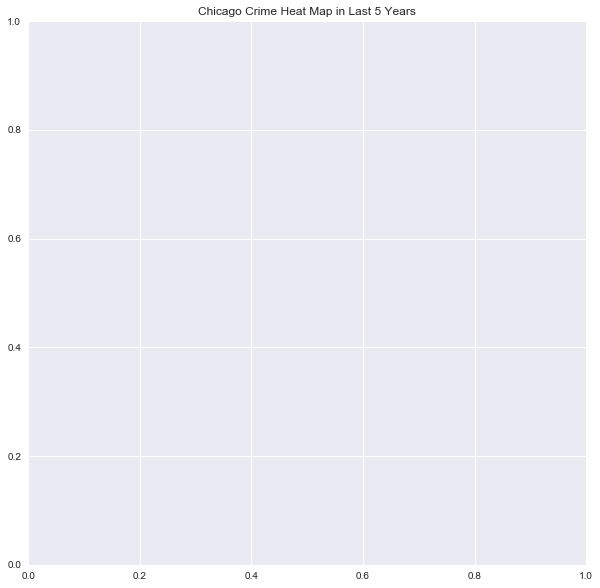

In [6]:
east = df['Longitude'].max()
west = df['Longitude'].min()
north = df['Latitude'].max()
south = df['Latitude'].min()

fig,ax = plt.subplots(figsize = (10,10))
ax.set_title("Chicago Crime Heat Map in Last 5 Years")

m = Basemap(projection='merc', llcrnrlat=south, urcrnrlat=north,
            llcrnrlon=west, urcrnrlon=east, lat_ts=south, resolution='h')
x, y = m(df['Longitude'].values, df['Latitude'].values)
m.hexbin(x, y, gridsize=500,
         bins='log', cmap=cm.YlOrRd_r);